In [1]:
# 필요한 패키지 설치
%pip install --upgrade google-api-python-client
%pip install --upgrade google-auth-oauthlib google-auth-httplib2
%pip install oauth2client
%pip install numpy
%pip install pandas
%pip install selenium
%pip install matplotlib
%pip install pyplot

# 라이브러리 추가
%pip install --upgrade google-api-python-client
%pip install --upgrade google-auth google-auth-oauthlib google-auth-httplib2
%pip install tabulate
%pip install -r requirements.txt
%pip install wordcloud

     ---------------------------------------- 10.9/10.9 MB 9.1 MB/s eta 0:00:00
  Attempting uninstall: google-api-python-client
    Found existing installation: google-api-python-client 2.72.0
    Uninstalling google-api-python-client-2.72.0:
      Successfully uninstalled google-api-python-client-2.72.0
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement pyplot (from versions: none)
ERROR: No matching distribution found for pyplot


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'


     -------------------------------------- 153.1/153.1 kB 4.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
# 시스템 관련 모듈
import os
import sys
import time
import re

# 유튜브 API 모듈
from googleapiclient.discovery import build
from googleapiclient.errors import HttpError
from oauth2client.tools import argparser

# 데이터 분석 모듈
import numpy as np
import pandas as pd

# 크롤링 관련 모듈
from selenium import webdriver as wd
from selenium.webdriver.common.by import By

# 시각화 관련 모듈
import site; site.getsitepackages()
from konlpy.tag import Mecab
from ast import increment_lineno
from matplotlib import pyplot as plt
# 차트를 주피터 노트북에 삽입하는 매직코드(코랩은 생략 가능)
%matplotlib inline
# 코랩은 차트에 한글이 깨진다. => 폰트가 없다. -> 폰트를 설치 후 사용가능(매번 인스턴스 생성할때마다 반복)
import matplotlib
import seaborn as sns

# 유튜브 Analytics API 관련 모델 추가

import google.oauth2.credentials
import google_auth_oauthlib.flow
from google_auth_oauthlib.flow import InstalledAppFlow
from tabulate import tabulate
from konlpy.tag import Mecab
from wordcloud import WordCloud
from collections import Counter

# 셀레니움을 이용한 플레이리스트 싫어요 수 뽑기

In [41]:
driver = wd.Chrome(
    './chromedriver/chromedriver.exe')

C:\Users\Marker\AppData\Local\Temp\ipykernel_9048\3570440997.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = wd.Chrome(


In [ ]:

playlist_link = 'PLNt6TwFqolR1qeYbB3j8wIdmzKPUXXPUo'
playlist_index = 1
target_site = f'https://www.youtube.com/watch?v=6DMH3ZHAe5o&list={playlist_link}&index={playlist_index}'
driver.get( target_site )

In [ ]:
# 게시물별 단위 조사
videos = driver.find_elements(By.CSS_SELECTOR,'#segmented-dislike-button > ytd-toggle-button-renderer > yt-button-shape > button')

print(videos)

[<selenium.webdriver.remote.webelement.WebElement (session="118104bf2a8313d8552f0483681e94de", element="d94b461f-2322-44e4-a2ff-a839f1943fed")>, <selenium.webdriver.remote.webelement.WebElement (session="118104bf2a8313d8552f0483681e94de", element="0975cea2-955d-43c2-878e-af15b75dc029")>]


In [ ]:
playlist_links = driver.find_elements(By.CSS_SELECTOR,'#wc-endpoint')
video_hash = driver.find_element(By.ID,'super-title')

In [ ]:
# 게시물 리스트에서 데이터를 하나씩 뽑은 후 그 위치에 해당하는 영상 클릭
# 5초 후 타이틀, 싫어요, 해시태그 뽑고 dislike 리스트에 append
# 사용 시 https://chrome.google.com/webstore/detail/return-youtube-dislike/gebbhagfogifgggkldgodflihgfeippi 확장앱 설치 필요.
dislike = list()
for t in range(len(playlist_links)) :
    playlist_link = playlist_links.pop( )
    playlist_link.click()
    time.sleep(5)
    dislike.append({
        'title' : driver.find_element(By.CSS_SELECTOR,'#title > h1 > yt-formatted-string').text,
        'dislikes' : videos[0].find_element(By.CSS_SELECTOR,'#text').text,
        'hashtag' : video_hash.text
    })



In [ ]:
# 데이터 프레임 생성

df = pd.DataFrame(dislike)

In [ ]:
# CSV 파일 변환

df.to_csv('탑현.csv', index=False, encoding='utf-8-sig')

# Youtube Analytics API

In [49]:
SCOPES = ["https://www.googleapis.com/auth/youtube.readonly",
  "https://www.googleapis.com/auth/yt-analytics.readonly"]

API_SERVICE_NAME = 'youtubeAnalytics'
API_VERSION = 'v2'
CLIENT_SECRETS_FILE = './client_secret/client_secret_333676912599-mouued5pr786ujj58svanio8nb706a8i.apps.googleusercontent.com.json'
def get_service():
  flow = InstalledAppFlow.from_client_secrets_file(CLIENT_SECRETS_FILE, SCOPES)
  credentials = flow.run_local_server()
  return build(API_SERVICE_NAME, API_VERSION, credentials = credentials)

def execute_api_request(client_library_function, **kwargs):
  response = client_library_function(
    **kwargs
  ).execute()
  return response

def create_table(table, headers=None):
    if headers:
        headerstring = "\t{}\t" * len(headers)
        print(headerstring.format(*headers))

    rowstring = "\t{}\t" * len(table[0])

    for row in table:
        print(rowstring.format(*row))


if __name__ == '__main__':

    youtubeAnalytics = get_service()
    result = execute_api_request(
        youtubeAnalytics.reports().query,
        ids='channel==MINE',
        startDate='2022-04-01',
        endDate='2022-12-31',
        metrics='estimatedMinutesWatched,views,likes,subscribersGained',
        dimensions='day',
        sort='day'
    )
    headers = ['date', 'estMinutesWatched', 'views', 'likes', 'subscribersGained']
    # create_table(result['rows'], headers=headers)
    print(tabulate(result['rows'], headers=headers, tablefmt="pretty"))
    
    # print(result)

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=333676912599-mouued5pr786ujj58svanio8nb706a8i.apps.googleusercontent.com&redirect_uri=http%3A%2F%2Flocalhost%3A8080%2F&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fyoutube.readonly+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fyt-analytics.readonly&state=b2aL791xf1vEltQg5Sp7iy7vPCqPdP&access_type=offline
+------------+-------------------+-------+-------+-------------------+
|    date    | estMinutesWatched | views | likes | subscribersGained |
+------------+-------------------+-------+-------+-------------------+
| 2022-04-01 |         1         |   4   |   0   |         0         |
| 2022-04-02 |         1         |   2   |   1   |         0         |
| 2022-04-03 |         1         |   7   |   0   |         0         |
| 2022-04-04 |        47         |  20   |  12   |         1         |
| 2022-04-05 |         0         |   3   |   0   |         0         |
| 2

In [47]:
SCOPES = ['https://www.googleapis.com/auth/yt-analytics.readonly']

API_SERVICE_NAME = 'youtubeAnalytics'
API_VERSION = 'v2'
CLIENT_SECRETS_FILE = './client_secret/client_secret_333676912599-mouued5pr786ujj58svanio8nb706a8i.apps.googleusercontent.com.json'
def get_service():
  flow = InstalledAppFlow.from_client_secrets_file(CLIENT_SECRETS_FILE, SCOPES)
  credentials = flow.run_local_server()
  return build(API_SERVICE_NAME, API_VERSION, credentials = credentials)

def execute_api_request(client_library_function, **kwargs):
  response = client_library_function(
    **kwargs
  ).execute()
  return response

def create_table(table, headers=None):
    if headers:
        headerstring = "\t{}\t" * len(headers)
        print(headerstring.format(*headers))

    rowstring = "\t{}\t" * len(table[0])

    for row in table:
        print(rowstring.format(*row))

if __name__ == '__main__':
  # Disable OAuthlib's HTTPs verification when running locally.
  # *DO NOT* leave this option enabled when running in production.
  os.environ['OAUTHLIB_INSECURE_TRANSPORT'] = '1'

  youtubeAnalytics = get_service()
  result = execute_api_request(
      youtubeAnalytics.reports().query,
      ids='channel==MINE',
      startDate='2022-02-16',
      endDate='2023-01-16',
      metrics='estimatedMinutesWatched,views,likes,subscribersGained',
      dimensions='day',
      sort='day'
  )

print(result, type(result))


Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=333676912599-mouued5pr786ujj58svanio8nb706a8i.apps.googleusercontent.com&redirect_uri=http%3A%2F%2Flocalhost%3A8080%2F&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fyt-analytics.readonly&state=azdSnUYdeOWh7chHFHhCtC5VTbamMl&access_type=offline
{'kind': 'youtubeAnalytics#resultTable', 'columnHeaders': [{'name': 'day', 'columnType': 'DIMENSION', 'dataType': 'STRING'}, {'name': 'estimatedMinutesWatched', 'columnType': 'METRIC', 'dataType': 'INTEGER'}, {'name': 'views', 'columnType': 'METRIC', 'dataType': 'INTEGER'}, {'name': 'likes', 'columnType': 'METRIC', 'dataType': 'INTEGER'}, {'name': 'subscribersGained', 'columnType': 'METRIC', 'dataType': 'INTEGER'}], 'rows': [['2022-02-16', 7, 4, 1, 4], ['2022-02-17', 0, 1, 0, 0], ['2022-02-18', 0, 3, 1, 1], ['2022-02-19', 6, 4, 1, 0], ['2022-02-20', 37, 17, 4, 1], ['2022-02-21', 4, 3, 0, 0], ['2022-02-22', 10, 6, 0, 0], ['

In [ ]:
# 필요한 데이터 확인

result['rows']

[['2022-02-16', 7, 4, 1, 4],
 ['2022-02-17', 0, 1, 0, 0],
 ['2022-02-18', 0, 3, 1, 1],
 ['2022-02-19', 6, 4, 1, 0],
 ['2022-02-20', 37, 17, 4, 1],
 ['2022-02-21', 4, 3, 0, 0],
 ['2022-02-22', 10, 6, 0, 0],
 ['2022-02-23', 7, 6, 0, 0],
 ['2022-02-24', 5, 6, 0, 0],
 ['2022-02-25', 0, 0, 0, 0],
 ['2022-02-26', 4, 7, 0, 0],
 ['2022-02-27', 0, 0, 0, 0],
 ['2022-02-28', 11, 18, 2, 0],
 ['2022-03-01', 9, 10, 0, 0],
 ['2022-03-02', 2, 3, 0, 0],
 ['2022-03-03', 1, 2, 0, 0],
 ['2022-03-04', 4, 8, 0, 1],
 ['2022-03-05', 0, 0, 0, 0],
 ['2022-03-06', 0, 1, 0, 0],
 ['2022-03-07', 15, 12, 2, 1],
 ['2022-03-08', 15, 8, 0, 0],
 ['2022-03-09', 0, 1, 0, 0],
 ['2022-03-10', 6, 4, 1, 0],
 ['2022-03-11', 0, 2, 0, 0],
 ['2022-03-12', 6, 4, 0, 0],
 ['2022-03-13', 5, 4, 1, 0],
 ['2022-03-14', 20, 18, 3, 0],
 ['2022-03-15', 0, 0, 0, 0],
 ['2022-03-16', 4, 2, 0, 0],
 ['2022-03-17', 0, 1, 0, 0],
 ['2022-03-18', 2, 3, 0, 0],
 ['2022-03-19', 3, 2, 0, 0],
 ['2022-03-20', 0, 1, 0, 0],
 ['2022-03-21', 21, 16, 3, 0],
 

In [50]:
# 데이터 정제

kkakka_data_cols = ['estimatedMinutesWatched','views','likes','subscribersGained']
kkakka_data_index = [] 
kkakka_data_data = []
for i in range(len(result['rows'])):
    kkakka_data_index.append(result['rows'][i][0])
    kkakka_data_data.append(result['rows'][i][1:])

In [51]:
# 본인 유튜브 일별 데이터 출력

kkakka_data_df = pd.DataFrame(kkakka_data_data, kkakka_data_index, kkakka_data_cols)
kkakka_data_df

,estimatedMinutesWatched,views,likes,subscribersGained
2022-04-01,1,4,0,0
2022-04-02,1,2,1,0
2022-04-03,1,7,0,0
2022-04-04,47,20,12,1
2022-04-05,0,3,0,0
...,...,...,...,...
2022-12-27,126,61,5,0
2022-12-28,173,90,0,0
2022-12-29,112,56,2,0
2022-12-30,90,51,0,1


# Kaggle 데이터 분석

In [2]:
# 데이터 불러오기 및 출력

kr_video = pd.read_csv("KR_youtube_trending_data.csv")
kr_video.tail()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
175149,OSjuuTM-Raw,'내장 냄새로 풀풀' 잡은 즉시 내장을 꺼내 미끼로 쓰는 대왕오징어 잡이│조업에서 ...,2023-01-04T06:53:07Z,UCFCtZJTuJhE18k8IXwmXTYQ,EBSDocumentary (EBS 다큐),25,2023-01-15T00:00:00Z,EBS|EBS documentary|EBS 다큐멘터리|다큐|docu|대왕오징어|오징...,1304086,4893,0,488,https://i.ytimg.com/vi/OSjuuTM-Raw/default.jpg,False,False,※ 이 영상은 2022년 12월 21일에 방송된 ＜인간과 바다 - 태평양의 거대한 ...
175150,h-k2PcfFDwk,aespa 에스파 'Girls' Stage Video,2023-01-01T13:01:41Z,UC9GtSLeksfK4yuJ_g1lgQbg,aespa,10,2023-01-15T00:00:00Z,aespa|에스파|Girls|카리나|지젤|윈터|닝닝|퍼포먼스|무대|안무|댄스|kar...,1980595,92028,0,2585,https://i.ytimg.com/vi/h-k2PcfFDwk/default.jpg,False,False,From SMTOWN LIVE 2023 : SMCU PALACE @KWANGYA🏰 ...
175151,bHSYy5elYDk,새해 첫 날 일본 가정집의 하루 브이로그,2023-01-03T02:22:09Z,UCaJCF6bmhG2wqPF3jA9gS4w,유우키의 일본이야기 YUUKI,22,2023-01-15T00:00:00Z,[None],912832,21570,0,2281,https://i.ytimg.com/vi/bHSYy5elYDk/default.jpg,False,False,냐옹
175152,wwKRaMu0pUE,(SUB) 이나연 탈탈털기 Q&A,2023-01-06T07:00:47Z,UCbFbzOHmp04AS2ZkFSpQ4Og,일단이나연 NAYEON,22,2023-01-15T00:00:00Z,[None],731664,13234,0,945,https://i.ytimg.com/vi/wwKRaMu0pUE/default.jpg,False,False,안녕하세요🙈 이번주는 큐앤에이로 찾아왔습니다...ㅎㅎ 궁금하신 점을 정말 많이 남겨...
175153,uJocp_7wuY8,우리나라에서 가장 오래된 100년 된 문방구를 찾았습니다!!!,2023-01-04T08:45:17Z,UCk6bX-MZXdte_7kG8TbMkqg,허팝Heopop,24,2023-01-15T00:00:00Z,허팝|heopop|gjvkq|stationery store|문방구|우리나라|대한민국...,638611,7366,0,784,https://i.ytimg.com/vi/uJocp_7wuY8/default.jpg,False,False,엄청난 역사를 자랑하는 100년된 문방구!!! 점점 문방구가 사라져가는 이 시점에 ...


In [3]:
# 컬럼명 기준으로 데이터 정제

df = pd.read_csv("KR_youtube_trending_data.csv")
kr_video = df[['title', 'channelTitle', 'tags', 'publishedAt', 'trending_date', 'categoryId', 'view_count', 'likes', 'comment_count']]
kr_video.tail()

,title,channelTitle,tags,publishedAt,trending_date,categoryId,view_count,likes,comment_count
175149,'내장 냄새로 풀풀' 잡은 즉시 내장을 꺼내 미끼로 쓰는 대왕오징어 잡이│조업에서 ...,EBSDocumentary (EBS 다큐),EBS|EBS documentary|EBS 다큐멘터리|다큐|docu|대왕오징어|오징...,2023-01-04T06:53:07Z,2023-01-15T00:00:00Z,25,1304086,4893,488
175150,aespa 에스파 'Girls' Stage Video,aespa,aespa|에스파|Girls|카리나|지젤|윈터|닝닝|퍼포먼스|무대|안무|댄스|kar...,2023-01-01T13:01:41Z,2023-01-15T00:00:00Z,10,1980595,92028,2585
175151,새해 첫 날 일본 가정집의 하루 브이로그,유우키의 일본이야기 YUUKI,[None],2023-01-03T02:22:09Z,2023-01-15T00:00:00Z,22,912832,21570,2281
175152,(SUB) 이나연 탈탈털기 Q&A,일단이나연 NAYEON,[None],2023-01-06T07:00:47Z,2023-01-15T00:00:00Z,22,731664,13234,945
175153,우리나라에서 가장 오래된 100년 된 문방구를 찾았습니다!!!,허팝Heopop,허팝|heopop|gjvkq|stationery store|문방구|우리나라|대한민국...,2023-01-04T08:45:17Z,2023-01-15T00:00:00Z,24,638611,7366,784


In [4]:
# 업로드된 날짜와 음악 카테고리를 기준으로 데이터 정제

kr_video_set = (kr_video['publishedAt'] >= '2022-01-01') & (kr_video['publishedAt'] <= '2023-01-01') & (kr_video['categoryId'] == 10)

kr_video_set_filtered = kr_video.loc[kr_video_set].drop_duplicates(['publishedAt']).reset_index(drop=True)

kr_video_set_filtered

,title,channelTitle,tags,publishedAt,trending_date,categoryId,view_count,likes,comment_count
0,[가요대제전 4K 직캠] 임윤아&이준호 'Señorita' (YOONA&JUNHO ...,MBCkpop,mbc|KPOP|dance|song|korea|korean|show|music co...,2022-01-01T04:01:41Z,2022-01-02T00:00:00Z,10,1027280,29062,1168
1,[옷소매 붉은 끝동 OST] 이선희 - 그대 손 놓아요 (녹음실 풀버전),TOON STUDIO,#TOONSTUDIO|툰스튜디오|웹툰|ost,2022-01-01T09:00:08Z,2022-01-02T00:00:00Z,10,134425,6213,479
2,WOOZI ‘Ruby’ Official Teaser,HYBE LABELS,HYBE|HYBE LABELS|하이브|하이브레이블즈,2022-01-01T14:59:57Z,2022-01-02T00:00:00Z,10,632144,134607,5317
3,WOOZI 'Ruby' Official MV,HYBE LABELS,HYBE|HYBE LABELS|하이브|하이브레이블즈,2022-01-03T08:59:58Z,2022-01-04T00:00:00Z,10,2153099,405146,25110
4,Step Back,Various Artists - Topic,GOT the beat|Step Back,2022-01-03T09:05:47Z,2022-01-04T00:00:00Z,10,356600,9335,0
...,...,...,...,...,...,...,...,...,...
817,가족사진 느낌으로 갈까?📸✨ | 도재정’s PHOTO STUDIO🎄,NCT,nct|nct127|엔시티|엔시티127|cover|커버|도영|재현|정우|도재정|크리...,2022-12-25T05:00:07Z,2022-12-31T00:00:00Z,10,354695,32492,1064
818,YG NEXT MOVEMENT,YG ENTERTAINMENT,YG Entertainment|YG 와이지|케이팝|K pop|K-pop,2022-12-31T15:00:42Z,2023-01-01T00:00:00Z,10,3922444,389403,23505
819,NewJeans (뉴진스) 'Ditto' Performance Video (Fix ...,NewJeans,NewJeans|뉴진스|민지|하니|다니엘|해린|혜인|뉴진스 민지|뉴진스 하니|뉴진스...,2022-12-31T08:00:01Z,2023-01-01T00:00:00Z,10,840289,58089,1397
820,[가요대제전] JEONG DONG WON - Baennori(정동원 – 뱃놀이) F...,MBCkpop,mbc|KPOP|dance|song|korea|korean|show|music co...,2022-12-31T16:16:00Z,2023-01-02T00:00:00Z,10,215364,9074,1309


In [5]:
# 자료 확인

display(kr_video_set_filtered.info(), kr_video_set_filtered.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   title          822 non-null    object
 1   channelTitle   822 non-null    object
 2   tags           822 non-null    object
 3   publishedAt    822 non-null    object
 4   trending_date  822 non-null    object
 5   categoryId     822 non-null    int64 
 6   view_count     822 non-null    int64 
 7   likes          822 non-null    int64 
 8   comment_count  822 non-null    int64 
dtypes: int64(4), object(5)
memory usage: 57.9+ KB


None

(822, 9)

# 시각화

In [6]:
# mecab 테스트

m = Mecab(dicpath="C:/mecab/mecab-ko-dic") # 사전 저장 경로에 자신이 mecab-ko-dic를 저장한 위치를 적는다. (default: "/usr/local/lib/mecab/dic/mecab-ko-dic")
m.pos("안녕하세요")

[('안녕', 'NNG'), ('하', 'XSV'), ('세요', 'EP+EF')]

In [7]:
# 기초통계량 확인

pd.options.display.float_format = '{:.2f}'.format # 소수점 둘째자리까지 확인
kr_video_set_filtered.describe()

# 좋아요, 댓글 수가 0개인 경우, 크리에이터 본인이 표시를 안하게 한 경우이다.

,categoryId,view_count,likes,comment_count
count,822.00,822.00,822.00,822.00
mean,10.00,2121499.69,215420.52,17102.06
std,0.00,4755513.29,478487.97,68142.27
min,10.00,54767.00,0.00,0.00
25%,10.00,256172.25,14782.50,1003.25
50%,10.00,555813.00,54327.00,2769.50
75%,10.00,1641843.25,155788.50,7336.00
max,10.00,45176630.00,4309966.00,1077229.00


<Figure size 1000x500 with 0 Axes>

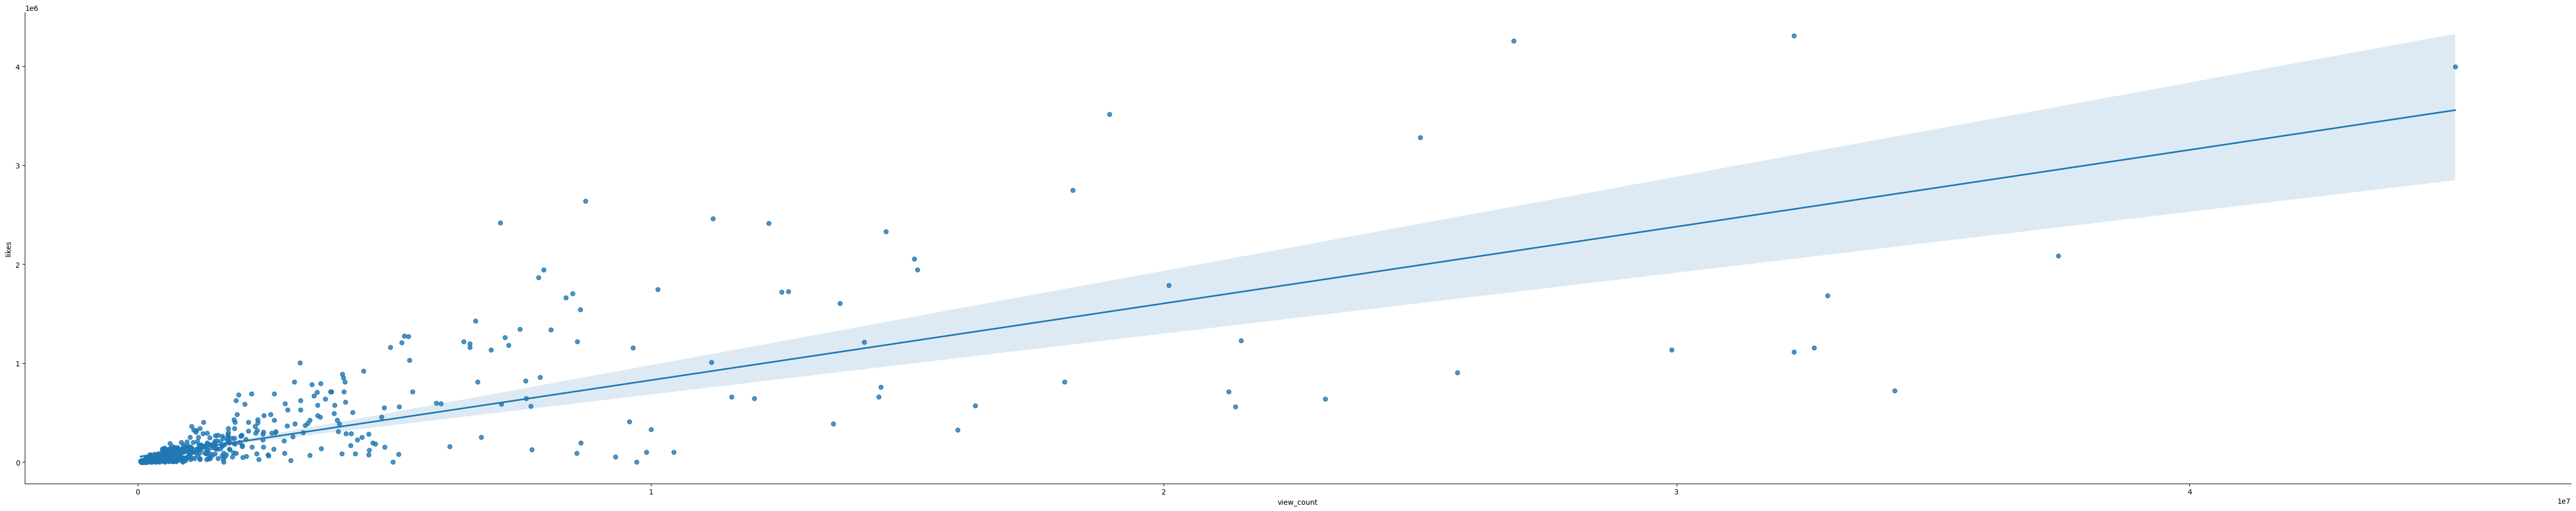

In [8]:
plt.figure(figsize=(10,5))
sns.lmplot(x='view_count', y='likes', data=kr_video_set_filtered, height=10, aspect=5) 
plt.show()

# 해석
# 인기 급상승 동영상의 경우, 조회수에 비레해서 좋아요 수가 높다는 걸 알 수 있다.
# 하지만, 각 영상마다 편차가 굉장히 커서 자료로는 부적합하다.

In [9]:
kr_video_set_filtered[kr_video_set_filtered['channelTitle'] == '성시경 SUNG SI KYUNG']

,title,channelTitle,tags,publishedAt,trending_date,categoryId,view_count,likes,comment_count
42,[성시경 노래] 18. 사랑이 늦어서 미안해 (With.김조한) l Sung Si ...,성시경 SUNG SI KYUNG,성시경|성시경유튜브|SUNGSIKYUNG|SSK|ソンシギョン|成始璄|성시경 음악|성...,2022-02-03T03:00:16Z,2022-02-04T00:00:00Z,10,106875,8836,1269
50,[성시경 노래] 19. 한번 더 이별 l Sung Si Kyung Music,성시경 SUNG SI KYUNG,성시경|성시경유튜브|SUNGSIKYUNG|SSK|ソンシギョン|成始璄|성시경 음악|성...,2022-02-07T03:00:08Z,2022-02-08T00:00:00Z,10,122731,9556,1217
61,[성시경 노래] 21. 희재 l Sung Si Kyung Music,성시경 SUNG SI KYUNG,성시경|성시경유튜브|SUNGSIKYUNG|SSK|ソンシギョン|成始璄|성시경 음악|성...,2022-02-14T03:00:11Z,2022-02-15T00:00:00Z,10,204228,14967,1709
91,[성시경 노래] 26. 나였으면 (With.나윤권) l Sung Si Kyung M...,성시경 SUNG SI KYUNG,성시경|성시경유튜브|SUNGSIKYUNG|SSK|ソンシギョン|成始璄|성시경 음악|성...,2022-03-03T03:00:10Z,2022-03-03T00:00:00Z,10,80960,10472,1202


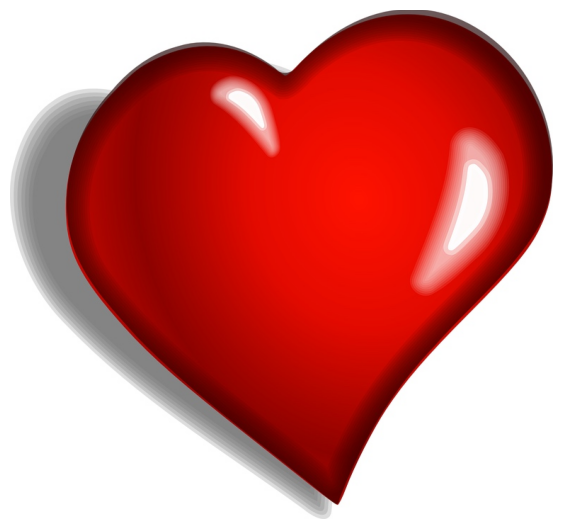

In [10]:
# 이미지 위에 워드클라우드 그리기 위해서 불러옴
from PIL import Image

# 이미지 로드 --> 이미지를 배열로 추출
heart_mask = np.array(Image.open('./heart.jpg'))

# 기본그리기 (워드클라우드 베이스 그림 체크)
plt.figure(figsize = (7,7))
plt.imshow(heart_mask, cmap=plt.cm.gray)
plt.axis('off')
plt.show()
# 이미지 정상 출력 확인

In [11]:
# comment 또는 title 같은 문자형 자료를 수집한 데이터를 탐색하여 주요 키워드를 빈도수에 따라 워드클라우드 형태로 시각화합니다.  
# 한글 형태소 분석 패키지  konlpy를 사용하여 명사만 추출합니다. 

# 이모티콘 제거 (https://shinminyong.tistory.com/4)
# 함수화 처리 https://velog.io/@moonstar/%EB%AF%B8%EB%8B%88%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8-%EB%8D%B0%EC%9D%B4%ED%84%B0-%EC%88%98%EC%A7%91

emoji_pattern = re.compile("|"
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\["
        u"\]+"
        , flags=re.UNICODE)

#분석에 어긋나는 불용어구 제외 (특수문자, 의성어)
han = re.compile(r'[ㄱ-ㅎㅏ-ㅣ!?~,".\n\r#\ufeff\u200d]')

def make_WordCloud(df, column_name):
    texts = []
    words = []
    nouns_words_list = []
    tokenizer  = Mecab(dicpath=r"C:/mecab/mecab-ko-dic")
    
    for i in range(len(df)):
        texts.append(df[column_name].iloc[i])
        
    
    for text in texts:
        emoji_remove = re.sub(emoji_pattern,"",text)
        hangul = re.sub(han,"",emoji_remove)
        words = tokenizer.nouns(hangul) # 명사만 추출
        
        nouns_words = [n for n in words if len(n) > 1] # 단어의 길이가 1개인 것은 제외 (ex) "ㅋ", "님")
        
        for nouns_word in nouns_words: 
            nouns_words_list.append(nouns_word)
        
    c = Counter(nouns_words_list)
    wc = WordCloud(
        font_path = 'C:/Windows/Fonts/NGULIM.TTF', # 폰트지정
        #max_words = 300, # 빈도 서열 300위까지 클라우드에 표현
        mask = heart_mask, # 이 부분이 생략 시 사각형 안에서 표시
        background_color='white' # 마스크 베이스를 흰색 세싱
    )
    wc_gen = wc.generate_from_frequencies(c)
    
    print(wc_gen.words_)
    
    plt.figure(figsize = (7,7))
    plt.imshow(wc_gen, cmap=plt.cm.gray)
    plt.axis('off')
    plt.show()

{'뮤직': 1.0, '트로트': 0.844311377245509, '아이돌': 0.718562874251497, '아이': 0.6946107784431138, '시티': 0.6526946107784432, '예능': 0.5688622754491018, '하이브': 0.5269461077844312, '임영웅': 0.5209580838323353, '노래': 0.5029940119760479, '트롯': 0.49101796407185627, '사랑': 0.49101796407185627, '나연': 0.46706586826347307, '딩고': 0.4491017964071856, '음악': 0.4491017964071856, '핑크': 0.4491017964071856, '신곡': 0.41317365269461076, '비디오': 0.40718562874251496, '영웅': 0.40119760479041916, '컴백': 0.38922155688622756, '여자': 0.38922155688622756, '티저': 0.38323353293413176, '라이브': 0.3652694610778443, '앨범': 0.3592814371257485, '드림': 0.3532934131736527, '이스': 0.3473053892215569, '무대': 0.33532934131736525, '솔로': 0.33532934131736525, '마크': 0.33532934131736525, '가요': 0.32934131736526945, '이찬원': 0.32335329341317365, '방탄소년단': 0.2934131736526946, '케이': 0.2874251497005988, '음중': 0.2694610778443114, '음악중심': 0.25149700598802394, '미니': 0.24550898203592814, '한류': 0.23353293413173654, '연구소': 0.23353293413173654, '레이블': 0.23353293413173

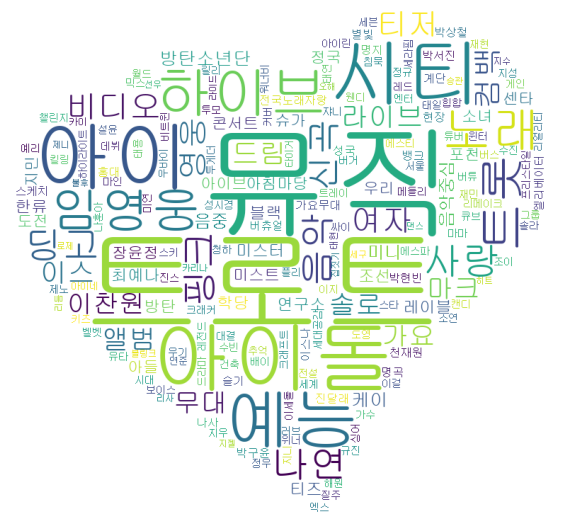

In [12]:
# tags 기준으로 워드클라우드 생성

make_WordCloud(kr_video_set_filtered,'tags')

{'방송': 1.0, '아이': 0.6938775510204082, '라이브': 0.673469387755102, '임영웅': 0.673469387755102, '노래': 0.6530612244897959, '킬링': 0.5918367346938775, '뮤직': 0.5918367346938775, '보이스': 0.5510204081632653, '여자': 0.5510204081632653, '방탄소년단': 0.5306122448979592, '사랑': 0.46938775510204084, '딩고': 0.46938775510204084, '명곡': 0.42857142857142855, '엔시': 0.42857142857142855, '전설': 0.40816326530612246, '드림': 0.40816326530612246, '불후': 0.3877551020408163, '레드': 0.32653061224489793, '아이브': 0.32653061224489793, '우리': 0.30612244897959184, '이찬원': 0.30612244897959184, '벨벳': 0.30612244897959184, '세라핌': 0.2857142857142857, '진스': 0.2653061224489796, '예능': 0.24489795918367346, '연구소': 0.24489795918367346, '아이돌': 0.20408163265306123, '이승윤': 0.20408163265306123, '소녀': 0.20408163265306123, '콘서트': 0.20408163265306123, '에스파': 0.1836734693877551, '침묵': 0.16326530612244897, '무대': 0.16326530612244897, '마마': 0.16326530612244897, '시티': 0.16326530612244897, '비하인드': 0.16326530612244897, '어디': 0.16326530612244897, '시대': 0.1632653

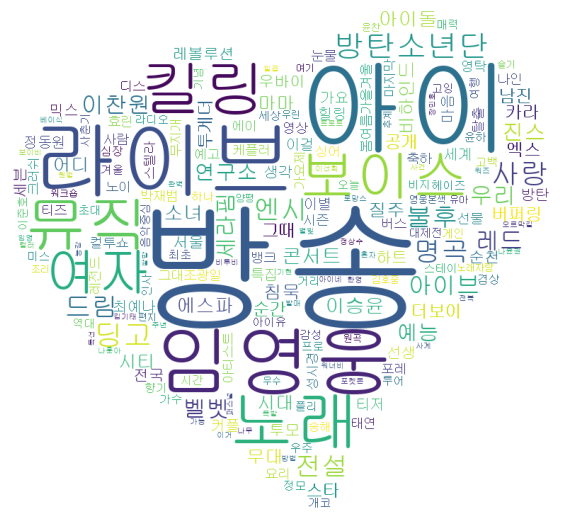

In [13]:
# title 기준으로 워드클라우드 생성

make_WordCloud(kr_video_set_filtered,'title')

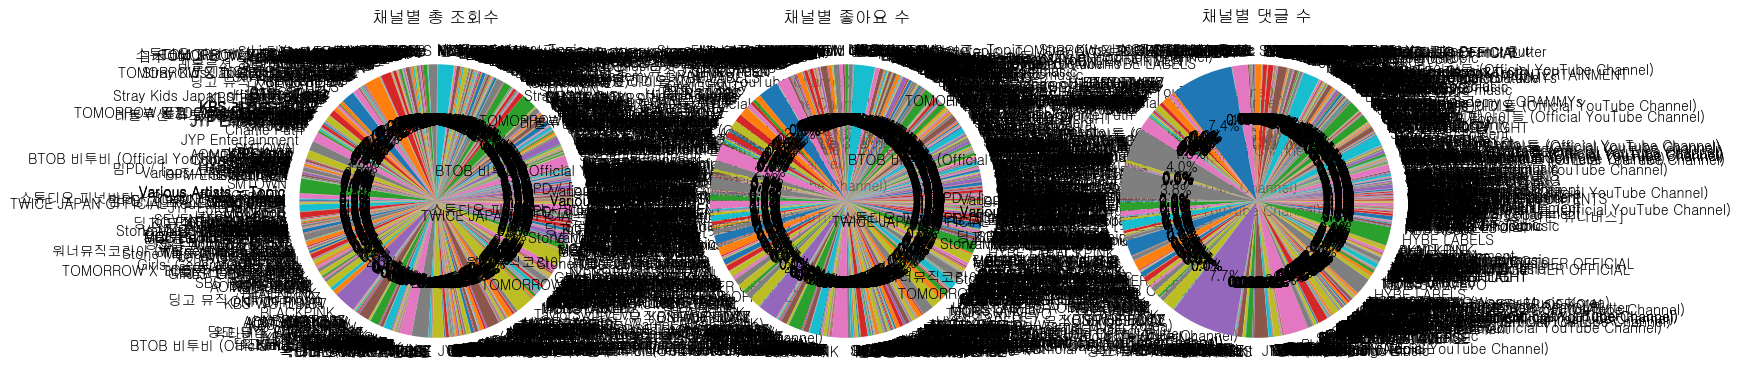

In [130]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

fig, axs = plt.subplots(1, 3, figsize=(15,5))
axs[0].pie(kr_video_set_filtered['view_count'], labels=kr_video_set_filtered['channelTitle'], autopct='%1.1f%%')
axs[0].set_title('채널별 총 조회수')
axs[1].pie(kr_video_set_filtered['likes'], labels=kr_video_set_filtered['channelTitle'], autopct='%1.1f%%')
axs[1].set_title('채널별 좋아요 수')
axs[2].pie(kr_video_set_filtered['comment_count'], labels=kr_video_set_filtered['channelTitle'], autopct='%1.1f%%')
axs[2].set_title('채널별 댓글 수')
plt.show()

# 기준이 되는 데이터 값이 너무 많다. 구체적인 기준 & 정제가 필요할 듯.	

In [18]:
# 계산을 위해 날짜 데이터를 datetime으로 변경

trending_date_split = list()
publish_time_split = list()

for i in kr_video_set_filtered["trending_date"]:
    trending_date_split.append(i.split('T')[0])
for i in kr_video_set_filtered["publishedAt"]:
    publish_time_split.append(i.split('T')[0])

kr_video_set_filtered["trending_date_date"] = pd.to_datetime(trending_date_split)
kr_video_set_filtered["publishedAt_date"] = pd.to_datetime(publish_time_split)

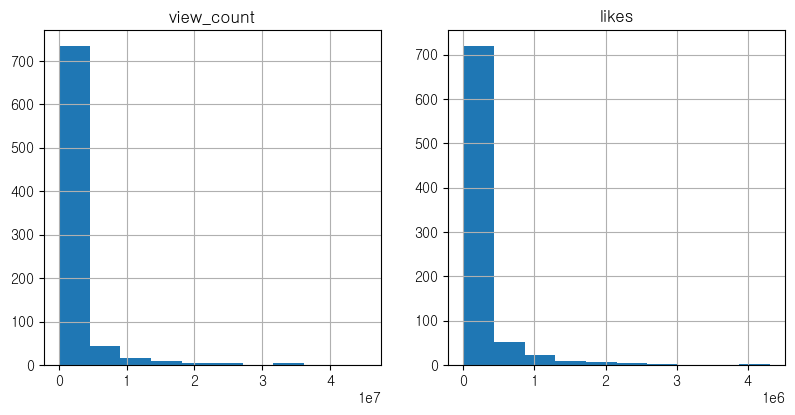

In [22]:
# 사전 데이터 조회

plt.figure(figsize = (20, 20))
for i in range(len(kr_video_set_filtered.describe().columns) - 2 ):
    plt.subplot(4, 4, i + 1)
    plt.title(kr_video_set_filtered[['view_count', 'likes']].describe().columns[i])
    plt.hist(kr_video_set_filtered[kr_video_set_filtered[['view_count', 'likes']].describe().columns[i]],bins = 10)
    plt.grid()

In [ ]:
from datetime import timedelta

# 태그 개수 조회, 제목 길이, 조회수 대비 좋아요 비율, 조회수 대비 싫어요 비율, 조회수 대비 댓글수 비율 컬럼 생성
kr_video_set_filtered["tag_count"] = kr_video_set_filtered["tags"].apply(lambda x : len(x.split("|")) if x != "[none]" else 0)
kr_video_set_filtered["title_length"] = kr_video_set_filtered["title"].apply(lambda x : len(str(x)) if pd.isnull(x) == False  else 0 )
kr_video_set_filtered["likes/views"] = kr_video_set_filtered["likes"] / kr_video_set_filtered["view_count"]
kr_video_set_filtered["comment_count/views"] = kr_video_set_filtered["comment_count"] / kr_video_set_filtered["view_count"]
kr_video_set_filtered["treTime-pubTime"] = kr_video_set_filtered["trending_date_date"] - kr_video_set_filtered["publishedAt_date"] + timedelta(days = 1)


In [ ]:
# view_count를 각 항목별로 소수점 둘째자리까지 출력

def summary_numeric(col=str):
    print(col)
    print("평균 {:>15}".format(format(kr_video_set_filtered[col].mean(), ",.2f")))
    print("최소 {:>15}".format(format(kr_video_set_filtered[col].min(), ",.2f")))
    print("중앙 {:>15}".format(format(kr_video_set_filtered[col].median(), ",.2f")))
    print("최대 {:>15}".format(format(kr_video_set_filtered[col].max(), ",.2f")))

In [ ]:
summary_numeric("view_count")

view_count
평균    2,121,499.69
최소       54,767.00
중앙      555,813.00
최대   45,176,630.00


In [135]:
# 2022년도 한국 음악 장르 인기 영상 중 높은 조회수 TOP 3

kr_video_set_filtered.sort_values(by = ["view_count"], ascending = [False]).head(3)

,title,channelTitle,tags,publishedAt,trending_date,categoryId,view_count,likes,comment_count,trending_date_date,publishedAt_date,tag_count,title_length,likes/views,comment_count/views,treTime-pubTime
534,BLACKPINK - ‘Pink Venom’ M/V,BLACKPINK,YG Entertainment|YG|와이지|K-pop|BLACKPINK|블랙핑크|블...,2022-08-19T04:00:13Z,2022-08-19T00:00:00Z,10,45176630,3995394,1077229,2022-08-19,2022-08-19,26,28,0.09,0.02,1 days
698,Taylor Swift - Anti-Hero (Official Music Video),TaylorSwiftVEVO,taylor swift|taylor|swift|antihero|anti hero|m...,2022-10-21T12:00:06Z,2022-10-28T00:00:00Z,10,37441221,2083432,64939,2022-10-28,2022-10-21,30,47,0.06,0.00,8 days
587,NCT 127 엔시티 127 '질주 (2 Baddies)' MV,SMTOWN,nct 127|2 baddies|mv|full speed|nct|smtown|엔시티...,2022-09-15T09:00:07Z,2022-09-16T00:00:00Z,10,34246212,721550,80657,2022-09-16,2022-09-15,40,35,0.02,0.00,2 days


In [136]:
print("전체 데이터 {}건".format(len(kr_video_set_filtered)) )
print("1000만이상 {}건 전체의 {:.2f}%".format(len(kr_video_set_filtered.loc[kr_video_set_filtered["view_count"] >= 10000000]),len(kr_video_set_filtered.loc[kr_video_set_filtered["view_count"] >= 10000000]) / len(kr_video_set_filtered) * 100))
print("100만이상 {}건 전체의 {:.2f}%".format(len(kr_video_set_filtered.loc[kr_video_set_filtered["view_count"] >= 1000000]),len(kr_video_set_filtered.loc[kr_video_set_filtered["view_count"] >= 1000000]) / len(kr_video_set_filtered) * 100))
print("100만이하 {}건 전체의 {:.2f}%".format(len(kr_video_set_filtered.loc[kr_video_set_filtered["view_count"] < 1000000]),len(kr_video_set_filtered.loc[kr_video_set_filtered["view_count"] < 1000000]) / len(kr_video_set_filtered) * 100))

전체 데이터 822건
1000만이상 39건 전체의 4.74%
100만이상 278건 전체의 33.82%
100만이하 544건 전체의 66.18%


조회수 100만 이하 데이터의 평균 조회수: 385940.20


(array([114.,  79.,  65.,  79.,  63.,  34.,  37.,  34.,  21.,  18.]),
 array([ 54767. , 148697.6, 242628.2, 336558.8, 430489.4, 524420. ,
        618350.6, 712281.2, 806211.8, 900142.4, 994073. ]),
 <BarContainer object of 10 artists>)

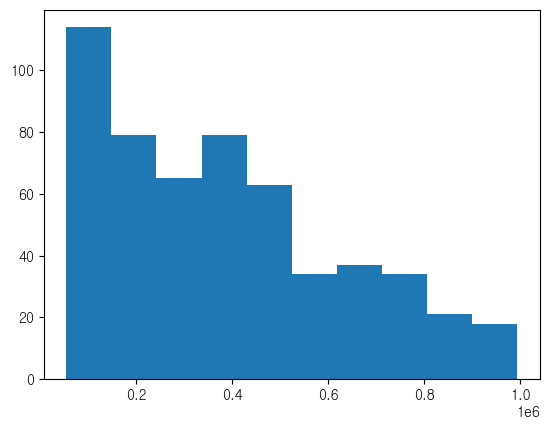

In [137]:
print("조회수 100만 이하 데이터의 평균 조회수: {:.2f}".format(kr_video_set_filtered["view_count"].loc[kr_video_set_filtered["view_count"] <= 1000000].mean()))
plt.hist(kr_video_set_filtered["view_count"].loc[kr_video_set_filtered["view_count"] <= 1000000])

In [138]:
# 2022년도 한국 인기 영상 중 낮은 조회수 TOP 3
kr_video_set_filtered.sort_values(by = ["view_count"]).head(3)

,title,channelTitle,tags,publishedAt,trending_date,categoryId,view_count,likes,comment_count,trending_date_date,publishedAt_date,tag_count,title_length,likes/views,comment_count/views,treTime-pubTime
292,[Dance Practice] 강다니엘(KANGDANIEL) - Read...,강다니엘 KANGDANIEL,[None],2022-05-11T11:00:23Z,2022-05-12T00:00:00Z,10,54767,10255,1743,2022-05-12,2022-05-11,1,55,0.19,0.03,2 days
608,이승윤 실버버튼 언박싱하기와 댓글 이벤트,이승윤,이승윤|lee seung yoon|lsy|마름모|mareumo|언박싱|실버버튼 언박...,2022-09-23T10:00:37Z,2022-09-25T00:00:00Z,10,58340,7397,1933,2022-09-25,2022-09-23,13,22,0.13,0.03,3 days
370,폴킴 (Paul Kim) - One More Time [Official Video],폴킴 - Paul Kim Official,폴킴|HOLIDAY|휴가|휴일|마음둘|마음하나|카톡|카카오톡|정해인|태형|kakao...,2022-06-14T09:00:11Z,2022-06-15T00:00:00Z,10,59065,4975,363,2022-06-15,2022-06-14,67,46,0.08,0.01,2 days


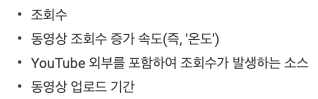

In [139]:
# 유튜브 인기 동영상 기준

from IPython.display import Image

Image('./youtube_rank.png')

(array([313., 219., 119.,  85.,  63.,  14.,   4.,   3.,   0.,   2.]),
 array([  1. ,  11.9,  22.8,  33.7,  44.6,  55.5,  66.4,  77.3,  88.2,
         99.1, 110. ]),
 <BarContainer object of 10 artists>)

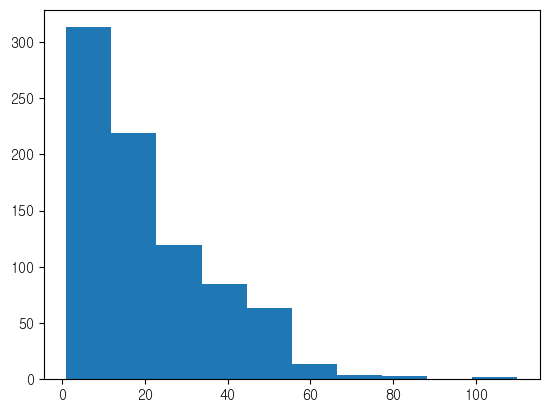

In [140]:
plt.hist(kr_video_set_filtered["tag_count"],bins = 10)

In [141]:
kr_video_set_filtered

,title,channelTitle,tags,publishedAt,trending_date,categoryId,view_count,likes,comment_count,trending_date_date,publishedAt_date,tag_count,title_length,likes/views,comment_count/views,treTime-pubTime
0,[가요대제전 4K 직캠] 임윤아&이준호 'Señorita' (YOONA&JUNHO ...,MBCkpop,mbc|KPOP|dance|song|korea|korean|show|music co...,2022-01-01T04:01:41Z,2022-01-02T00:00:00Z,10,1027280,29062,1168,2022-01-02,2022-01-01,55,87,0.03,0.00,2 days
1,[옷소매 붉은 끝동 OST] 이선희 - 그대 손 놓아요 (녹음실 풀버전),TOON STUDIO,#TOONSTUDIO|툰스튜디오|웹툰|ost,2022-01-01T09:00:08Z,2022-01-02T00:00:00Z,10,134425,6213,479,2022-01-02,2022-01-01,4,40,0.05,0.00,2 days
2,WOOZI ‘Ruby’ Official Teaser,HYBE LABELS,HYBE|HYBE LABELS|하이브|하이브레이블즈,2022-01-01T14:59:57Z,2022-01-02T00:00:00Z,10,632144,134607,5317,2022-01-02,2022-01-01,4,28,0.21,0.01,2 days
3,WOOZI 'Ruby' Official MV,HYBE LABELS,HYBE|HYBE LABELS|하이브|하이브레이블즈,2022-01-03T08:59:58Z,2022-01-04T00:00:00Z,10,2153099,405146,25110,2022-01-04,2022-01-03,4,24,0.19,0.01,2 days
4,Step Back,Various Artists - Topic,GOT the beat|Step Back,2022-01-03T09:05:47Z,2022-01-04T00:00:00Z,10,356600,9335,0,2022-01-04,2022-01-03,2,9,0.03,0.00,2 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817,가족사진 느낌으로 갈까?📸✨ | 도재정’s PHOTO STUDIO🎄,NCT,nct|nct127|엔시티|엔시티127|cover|커버|도영|재현|정우|도재정|크리...,2022-12-25T05:00:07Z,2022-12-31T00:00:00Z,10,354695,32492,1064,2022-12-31,2022-12-25,34,37,0.09,0.00,7 days
818,YG NEXT MOVEMENT,YG ENTERTAINMENT,YG Entertainment|YG 와이지|케이팝|K pop|K-pop,2022-12-31T15:00:42Z,2023-01-01T00:00:00Z,10,3922444,389403,23505,2023-01-01,2022-12-31,5,16,0.10,0.01,2 days
819,NewJeans (뉴진스) 'Ditto' Performance Video (Fix ...,NewJeans,NewJeans|뉴진스|민지|하니|다니엘|해린|혜인|뉴진스 민지|뉴진스 하니|뉴진스...,2022-12-31T08:00:01Z,2023-01-01T00:00:00Z,10,840289,58089,1397,2023-01-01,2022-12-31,22,51,0.07,0.00,2 days
820,[가요대제전] JEONG DONG WON - Baennori(정동원 – 뱃놀이) F...,MBCkpop,mbc|KPOP|dance|song|korea|korean|show|music co...,2022-12-31T16:16:00Z,2023-01-02T00:00:00Z,10,215364,9074,1309,2023-01-02,2022-12-31,34,100,0.04,0.01,3 days


In [151]:
kr_video_set_filtered[["likes/views", "comment_count/views"]].describe()

# 조회수 대비 좋아요 수는 평균 10%, 댓글 수는 평균 1%

,likes/views,comment_count/views
count,822.00,822.00
mean,0.10,0.01
std,0.07,0.01
min,0.00,0.00
25%,0.04,0.00
50%,0.10,0.00
75%,0.15,0.01
max,0.35,0.06


In [153]:
kr_video_set_filtered.sort_values(by = ["likes/views"], ascending = [False]).head(10)

# 조회수 대비 좋아요 수가 높은 가수는 대부분 방탄소년단이다. 또한, EXO도 한몫하는 거같다.

,title,channelTitle,tags,publishedAt,trending_date,categoryId,view_count,likes,comment_count,trending_date_date,publishedAt_date,tag_count,title_length,likes/views,comment_count/views,treTime-pubTime
231,BTS (방탄소년단) 'Butter' @ The 64th GRAMMY Awards,BANGTANTV,방탄소년단|BTS|BANGTAN|알엠|RM|슈가|SUGA|제이홉|jhope|지민|정...,2022-04-23T01:00:03Z,2022-04-23T00:00:00Z,10,1962446,680568,38732,2022-04-23,2022-04-23,18,45,0.35,0.02,1 days
161,BTS (방탄소년단) PIANO SHEET MUSIC Official Trailer,BANGTANTV,방탄소년단|BTS|BANGTAN|알엠|RM|슈가|SUGA|제이홉|jhope|지민|정...,2022-03-28T02:00:01Z,2022-03-28T00:00:00Z,10,1042855,360748,10701,2022-03-28,2022-03-28,18,46,0.35,0.01,1 days
697,진 (Jin) 'The Astronaut' Official MV,HYBE LABELS,HYBE|HYBE LABELS|하이브|하이브레이블즈,2022-10-28T04:00:01Z,2022-10-28T00:00:00Z,10,7070402,2418963,283382,2022-10-28,2022-10-28,4,35,0.34,0.04,1 days
353,For Youth,BTS - Topic,BTS (방탄소년단)|BTS|Proof|For Youth,2022-06-10T04:04:32Z,2022-06-10T00:00:00Z,10,1909170,619932,0,2022-06-10,2022-06-10,4,9,0.32,0.00,1 days
65,변치 않는 사랑｜밸런타인데이 꽃꽂이,EXO,EXO|엑소|엑소케이|엑소엠|exok|exom|발렌타인데이|밸런타인데이|꽃꽂이|초콜...,2022-02-14T10:00:25Z,2022-02-15T00:00:00Z,10,233020,74214,6526,2022-02-15,2022-02-14,22,19,0.32,0.03,2 days
214,BTS (방탄소년단) We Are Bulletproof,BANGTANTV,방탄소년단|BTS|BANGTAN|알엠|RM|슈가|SUGA|제이홉|jhope|지민|정...,2022-04-17T07:00:14Z,2022-04-18T00:00:00Z,10,3161913,1005915,52521,2022-04-18,2022-04-17,18,30,0.32,0.02,2 days
66,BTS (방탄소년단) PERMISSION TO DANCE ON STAGE - SEO...,HYBE LABELS,HYBE|HYBE LABELS|하이브|하이브레이블즈,2022-02-16T01:00:14Z,2022-02-16T00:00:00Z,10,1279497,400975,14133,2022-02-16,2022-02-16,4,53,0.31,0.01,1 days
352,달려라 방탄,BTS - Topic,BTS (방탄소년단)|BTS|Proof|달려라 방탄|Run BTS,2022-06-10T04:09:21Z,2022-06-10T00:00:00Z,10,2212871,689091,0,2022-06-10,2022-06-10,5,6,0.31,0.00,1 days
20,가장 맘에 드는 ‘ㅋ’ ｜도자기 공예,EXO,EXO|엑소|엑소케이|엑소엠|exok|exom|백현|baekhyun|큥|큥튜브|ba...,2022-01-17T10:00:09Z,2022-01-18T00:00:00Z,10,238115,73296,6929,2022-01-18,2022-01-17,13,20,0.31,0.03,2 days
417,j-hope 'MORE' Official MV,HYBE LABELS,HYBE|HYBE LABELS|하이브|하이브레이블즈,2022-07-01T04:00:00Z,2022-07-01T00:00:00Z,10,8725115,2640899,530159,2022-07-01,2022-07-01,4,25,0.30,0.06,1 days


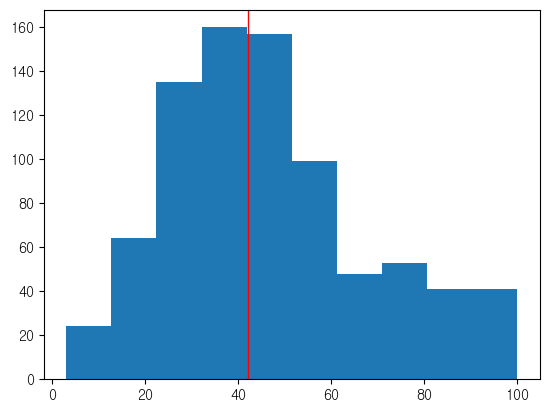

In [154]:
plt.hist(kr_video_set_filtered["title_length"],bins = 10)
plt.axvline(x = 42, color = "r", linestyle = "-", linewidth = 1)
# 제목 길이는 10~50개 사이의 항목들이 많이 차지하고 있으며, 평균은 약 42자 정도.

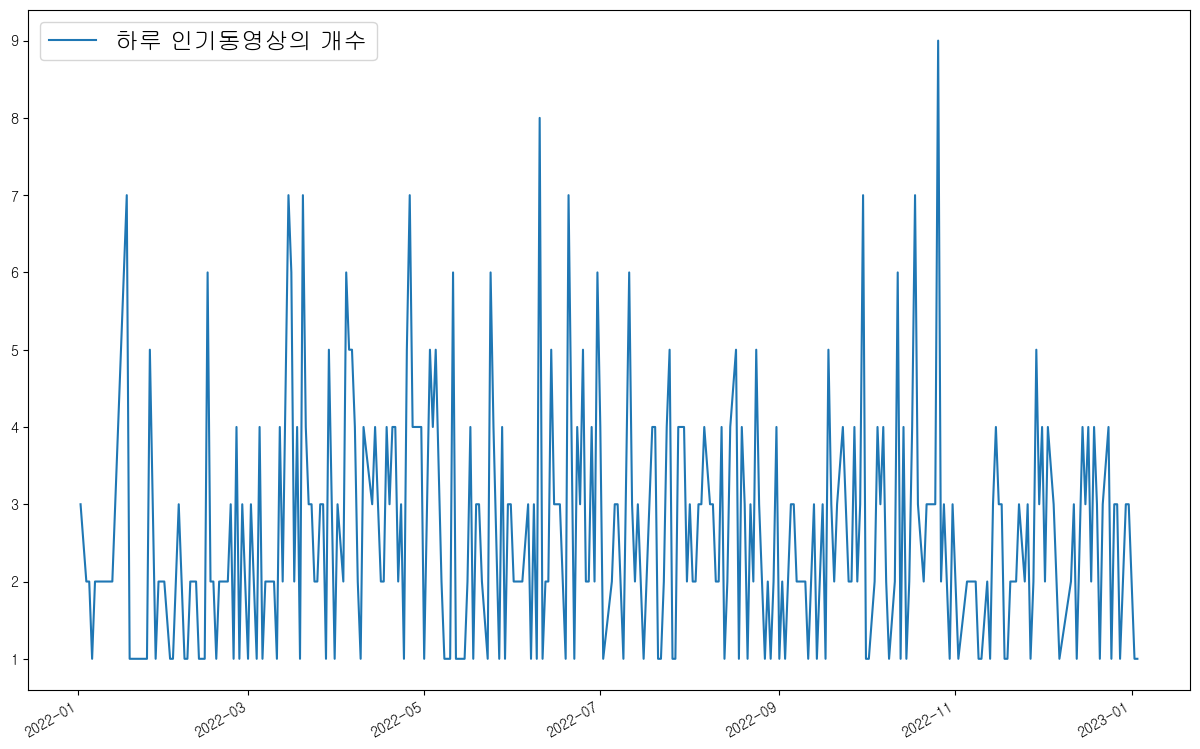

In [161]:
plt.figure(figsize = (15,10))
kr_video_set_filtered["trending_date_date"].value_counts().plot(label = "하루 인기동영상의 개수")

plt.legend(prop = {"size":17})

In [163]:
print("하루 인기동영상의 개수")
print("평균 : {:.2f}개".format(kr_video_set_filtered["trending_date_date"].value_counts().mean()))
print("최대 : {:.2f}개".format(kr_video_set_filtered["trending_date_date"].value_counts().max()))
print("최소 : {:.2f}개".format(kr_video_set_filtered["trending_date_date"].value_counts().min()))

하루 인기동영상의 개수
평균 : 2.66개
최대 : 9.00개
최소 : 1.00개


In [165]:
kr_video_set_filtered["treTime-pubTime"].describe()

# 인기동영상들은 동영상을 평균적으로 게시하고 다음 날 인기동영상이 되었다.

count                          822
mean     2 days 10:16:38.540145985
std      1 days 03:43:13.397772776
min                1 days 00:00:00
25%                2 days 00:00:00
50%                2 days 00:00:00
75%                2 days 00:00:00
max               12 days 00:00:00
Name: treTime-pubTime, dtype: object

In [183]:
pd.cut(kr_video_set_filtered["treTime-pubTime"],[timedelta(days = 0),timedelta(days = 1),timedelta(days = 2),timedelta(days = 3),timedelta(days = 20)]).value_counts(sort = False,normalize = True)

# 대부분의 동영상들이 영상을 업로드하고, 3일 이내에 인기 동영상이 되는걸로 보아, 3일 이내에 인기 동영상에 오르지 못하면 쉽지 않은 것 같다.

(0 days 00:00:00, 1 days 00:00:00]    0.03
(1 days 00:00:00, 2 days 00:00:00]    0.75
(2 days 00:00:00, 3 days 00:00:00]    0.11
(3 days 00:00:00, 20 days 00:00:00]   0.11
Name: treTime-pubTime, dtype: float64

C:\Users\Marker\AppData\Local\Temp\ipykernel_31460\267149918.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data = kr_video_set_filtered.loc[kr_video_set_filtered["view_count"] <= 1000000].corr(method="pearson"), annot = True, fmt = ".2f", linewidths = .5, cmap = "Blues")


<AxesSubplot: >

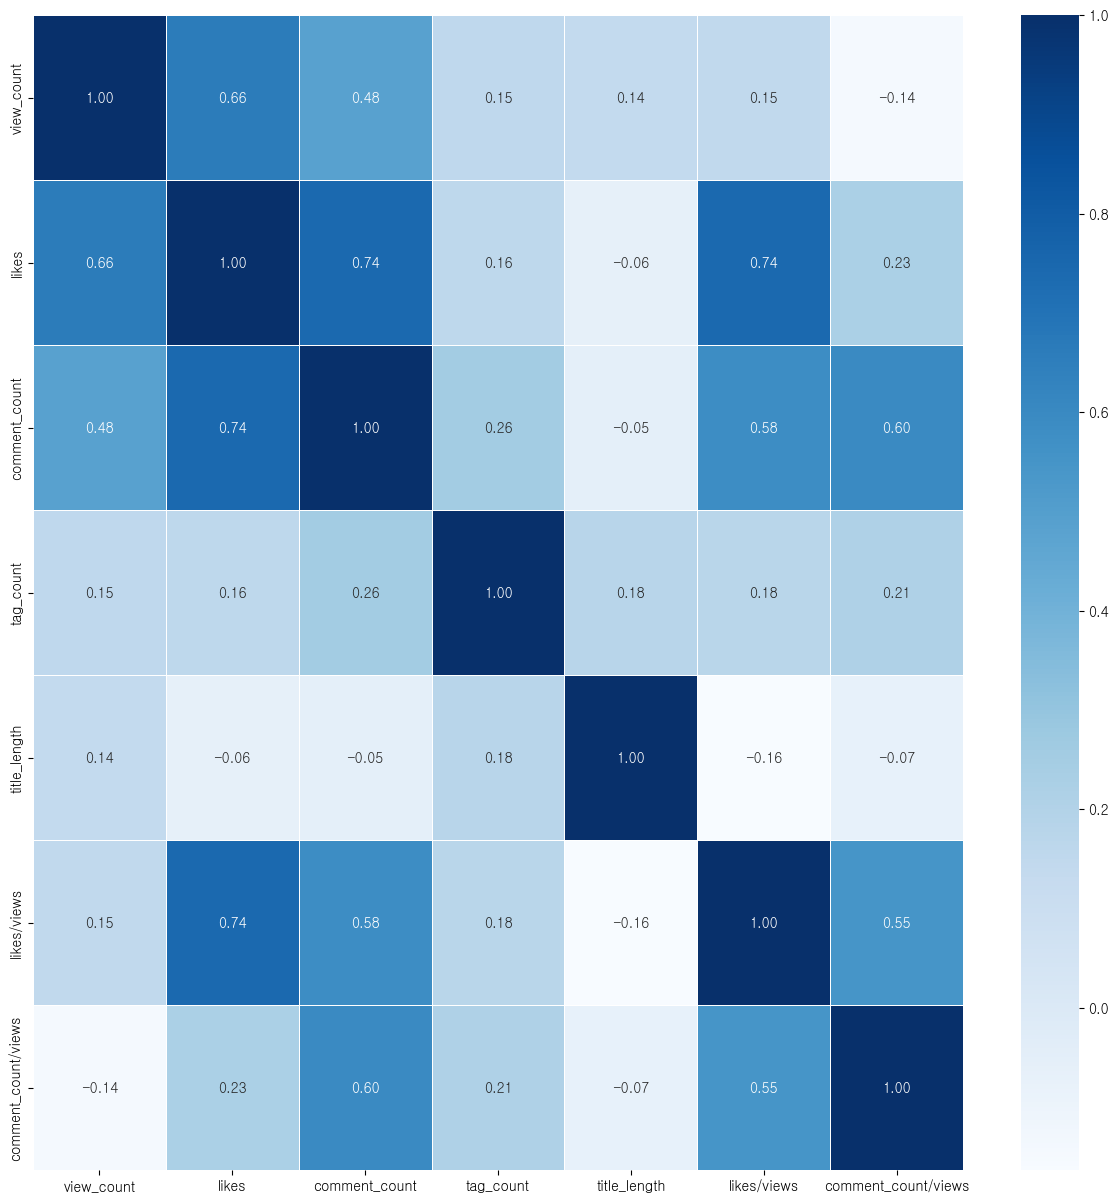

In [171]:
plt.figure(figsize = (15,15))
kr_video_set_filtered = kr_video_set_filtered[['title', 'channelTitle', 'tags', 'publishedAt', 'trending_date', 'view_count', 'likes', 'comment_count', 'trending_date_date', 'publishedAt_date', 'tag_count', 'title_length', 'likes/views', 'comment_count/views', 'treTime-pubTime']]
sns.heatmap(data = kr_video_set_filtered.loc[kr_video_set_filtered["view_count"] <= 1000000].corr(method="pearson"), annot = True, fmt = ".2f", linewidths = .5, cmap = "Blues")

# 좋아요와 싫어요를 누르거나 댓글을 남기려면 먼저 동영상을 조회해야하기 때문에, 조회수가 likes, comment_count에 영향을 준다고 해석해야 한다.
# tag_count, title_length, description_length가 views와 상관관계가 있지 않을까 생각했었는데, 관계가 없는 것으로 나타났다.

# 선정한 유튜버들이 2022 인기 급상승 동영상(음악 카테고리)에 있는가?

In [173]:
kr_video_set_filtered[kr_video_set_filtered['channelTitle'] == '성시경 SUNG SI KYUNG']

,title,channelTitle,tags,publishedAt,trending_date,view_count,likes,comment_count,trending_date_date,publishedAt_date,tag_count,title_length,likes/views,comment_count/views,treTime-pubTime
42,[성시경 노래] 18. 사랑이 늦어서 미안해 (With.김조한) l Sung Si ...,성시경 SUNG SI KYUNG,성시경|성시경유튜브|SUNGSIKYUNG|SSK|ソンシギョン|成始璄|성시경 음악|성...,2022-02-03T03:00:16Z,2022-02-04T00:00:00Z,106875,8836,1269,2022-02-04,2022-02-03,18,57,0.08,0.01,2 days
50,[성시경 노래] 19. 한번 더 이별 l Sung Si Kyung Music,성시경 SUNG SI KYUNG,성시경|성시경유튜브|SUNGSIKYUNG|SSK|ソンシギョン|成始璄|성시경 음악|성...,2022-02-07T03:00:08Z,2022-02-08T00:00:00Z,122731,9556,1217,2022-02-08,2022-02-07,17,42,0.08,0.01,2 days
61,[성시경 노래] 21. 희재 l Sung Si Kyung Music,성시경 SUNG SI KYUNG,성시경|성시경유튜브|SUNGSIKYUNG|SSK|ソンシギョン|成始璄|성시경 음악|성...,2022-02-14T03:00:11Z,2022-02-15T00:00:00Z,204228,14967,1709,2022-02-15,2022-02-14,21,37,0.07,0.01,2 days
91,[성시경 노래] 26. 나였으면 (With.나윤권) l Sung Si Kyung M...,성시경 SUNG SI KYUNG,성시경|성시경유튜브|SUNGSIKYUNG|SSK|ソンシギョン|成始璄|성시경 음악|성...,2022-03-03T03:00:10Z,2022-03-03T00:00:00Z,80960,10472,1202,2022-03-03,2022-03-03,17,50,0.13,0.01,1 days


In [175]:
kr_video_set_filtered[kr_video_set_filtered['channelTitle'] == '임한별']

,title,channelTitle,tags,publishedAt,trending_date,view_count,likes,comment_count,trending_date_date,publishedAt_date,tag_count,title_length,likes/views,comment_count/views,treTime-pubTime


In [176]:
kr_video_set_filtered[kr_video_set_filtered['channelTitle'] == '탑현월드 Tophyun World']

,title,channelTitle,tags,publishedAt,trending_date,view_count,likes,comment_count,trending_date_date,publishedAt_date,tag_count,title_length,likes/views,comment_count/views,treTime-pubTime


In [177]:
kr_video_set_filtered[kr_video_set_filtered['channelTitle'] == '마라는대로 MaRa Music']

,title,channelTitle,tags,publishedAt,trending_date,view_count,likes,comment_count,trending_date_date,publishedAt_date,tag_count,title_length,likes/views,comment_count/views,treTime-pubTime


In [178]:
kr_video_set_filtered[kr_video_set_filtered['channelTitle'] == '버블디아']

,title,channelTitle,tags,publishedAt,trending_date,view_count,likes,comment_count,trending_date_date,publishedAt_date,tag_count,title_length,likes/views,comment_count/views,treTime-pubTime


In [179]:
kr_video_set_filtered[kr_video_set_filtered['channelTitle'] == '셀프노트 스튜디오']

,title,channelTitle,tags,publishedAt,trending_date,view_count,likes,comment_count,trending_date_date,publishedAt_date,tag_count,title_length,likes/views,comment_count/views,treTime-pubTime


In [180]:
kr_video_set_filtered[kr_video_set_filtered['channelTitle'] == '까까들(Cookies)']

,title,channelTitle,tags,publishedAt,trending_date,view_count,likes,comment_count,trending_date_date,publishedAt_date,tag_count,title_length,likes/views,comment_count/views,treTime-pubTime


- 나름 유명하다 생각한 음악 커버 유튜버들을 선정한 것인데, 생각보다 쉽지 않다.

# 결론

-
-
-
-
